## Sorting outliners

In [1]:
import os
os.chdir("T:/laupodteam/AIOS/Chontira/CellDynClustering")
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import hdbscan
from evaluation.fast_dunn_index import dunn_fast
from evaluation.util import *
import ast
from graphic_stuffs import *
import time


## Evaluators

evaluators= {'silhouette_score': silhouette_score,
            'davies_bouldin_score': davies_bouldin_score,
            'dunn_fast': dunn_fast}

dnd= {'davies_bouldin_score': davies_bouldin_score,
    'dunn_fast': dunn_fast}

db= {'davies_bouldin_score': davies_bouldin_score}

In [2]:
dm6_with_labels = pd.read_feather("data/embedded_celldyn_ALL_nn50_ndim6_w_labels_.feather")
others_labels = dm6_with_labels.loc[:,dm6_with_labels.columns.isin(['sex', 'age','study_id', 'analysis_dt', 'sample_dt'])]
dm6 = dm6_with_labels.iloc[:, 0:6]
dm6.shape

(3093792, 6)

In [3]:
dm6_sampled = dm6.sample(20000)

Unique predicted labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26] with their amounts [   16     4     3     5     4     7     5     5     6     8     5     7
     4     3     4    48 19798     2     7     4     6     8     4     9
     5    10     5     8]
Time taken 0.08 minutes


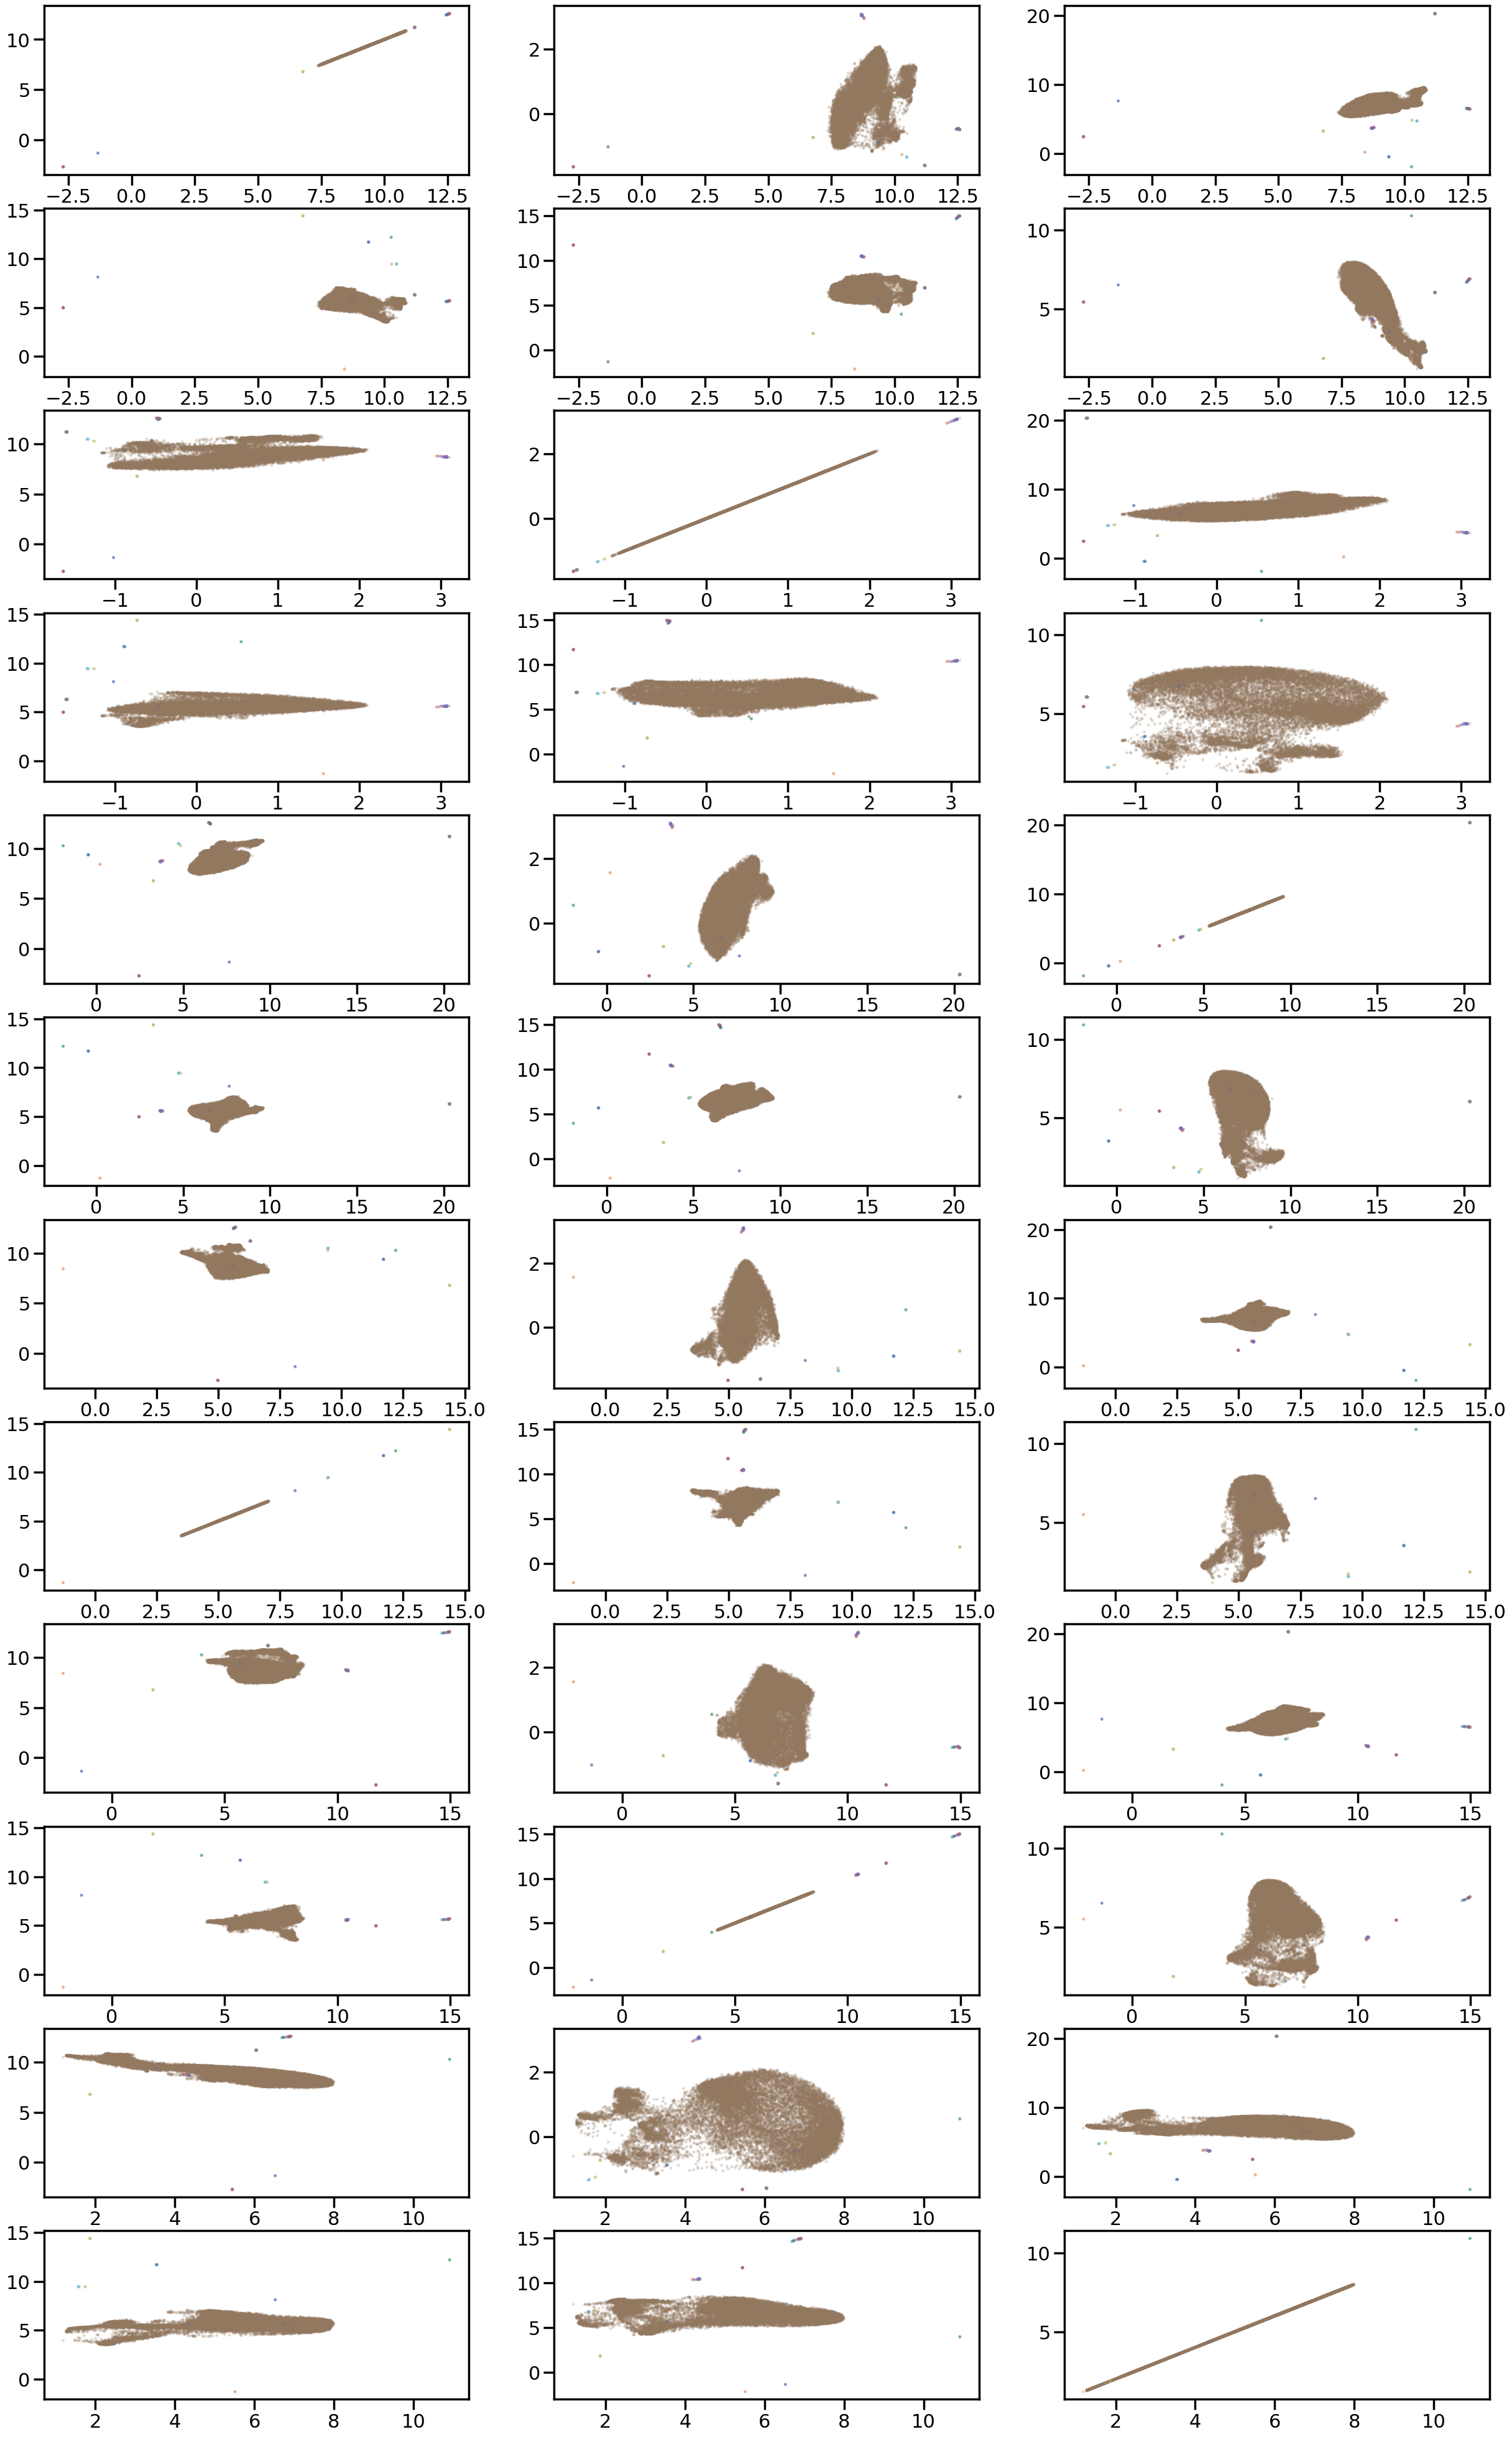

In [4]:
chosen_param = {"min_cluster_size":2,
                "metric": 'l2',
                "cluster_selection_method" : "eom",
                "cluster_selection_epsilon": 0}
model, labels = fit_predict_score( dm6_sampled, hdbscan.HDBSCAN, param=chosen_param, evaluators=None)
#plot_scatter_preset_with_labels(dm6_sampled,labels,[0,1])
plot_multi_scatter_with_labels(dm6_sampled,labels, 12, 3, remove_noise=True)

In [6]:
threshold = pd.Series(model.outlier_scores_).quantile(0.999)
outliers = np.where(model.outlier_scores_ > threshold)[0]


In [5]:
def plot_multi_scatter_outliers(data,outliers, row, col, subsample = False):

    plot_df = data
    if(type(subsample)==int):
        plot_df = plot_df.sample(subsample)

    fig, ax = plt.subplots(row,col,figsize = (30,50))
    i,j = 0,0
 
    for colx in plot_df:
        for coly in plot_df:
            ax[i,j].scatter(plot_df[colx],plot_df[coly], s = 1, c = "grey",alpha = 0.2)
            ax[i,j].scatter(plot_df.loc[outliers,dm6_sampled.columns == colx],plot_df.loc[outliers,dm6_sampled.columns == coly], s = 5,c='red', alpha = 0.2)
            i = i+1 if j == col-1 else i
            j = j+1 if j < col-1 else 0

def plot_scatter_outliers(data,x,y,outliers, subsample = False):

    plot_df = data
    
    if(type(subsample)==int):
        plot_df = plot_df.sample(subsample)

    plt.scatter(plot_df[x],plot_df[y], s=50, linewidth=0, c='gray', alpha=0.25)
    plt.scatter(plot_df.loc[outliers,dm6_sampled.columns == x],plot_df.loc[outliers,dm6_sampled.columns == y], s=50, linewidth=0, c='red', alpha=0.5)


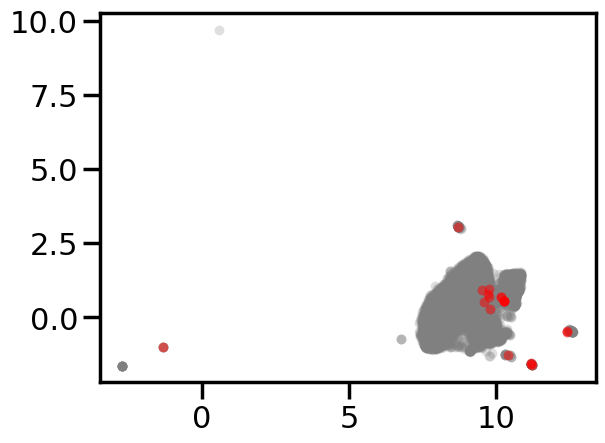

In [27]:
plt.scatter(dm6_sampled.iloc[:,0], dm6_sampled.iloc[:,1], s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(dm6_sampled.iloc[outliers,0], dm6_sampled.iloc[outliers,1], s=50, linewidth=0, c='red', alpha=0.5)

In [34]:
unique = np.unique(labels)

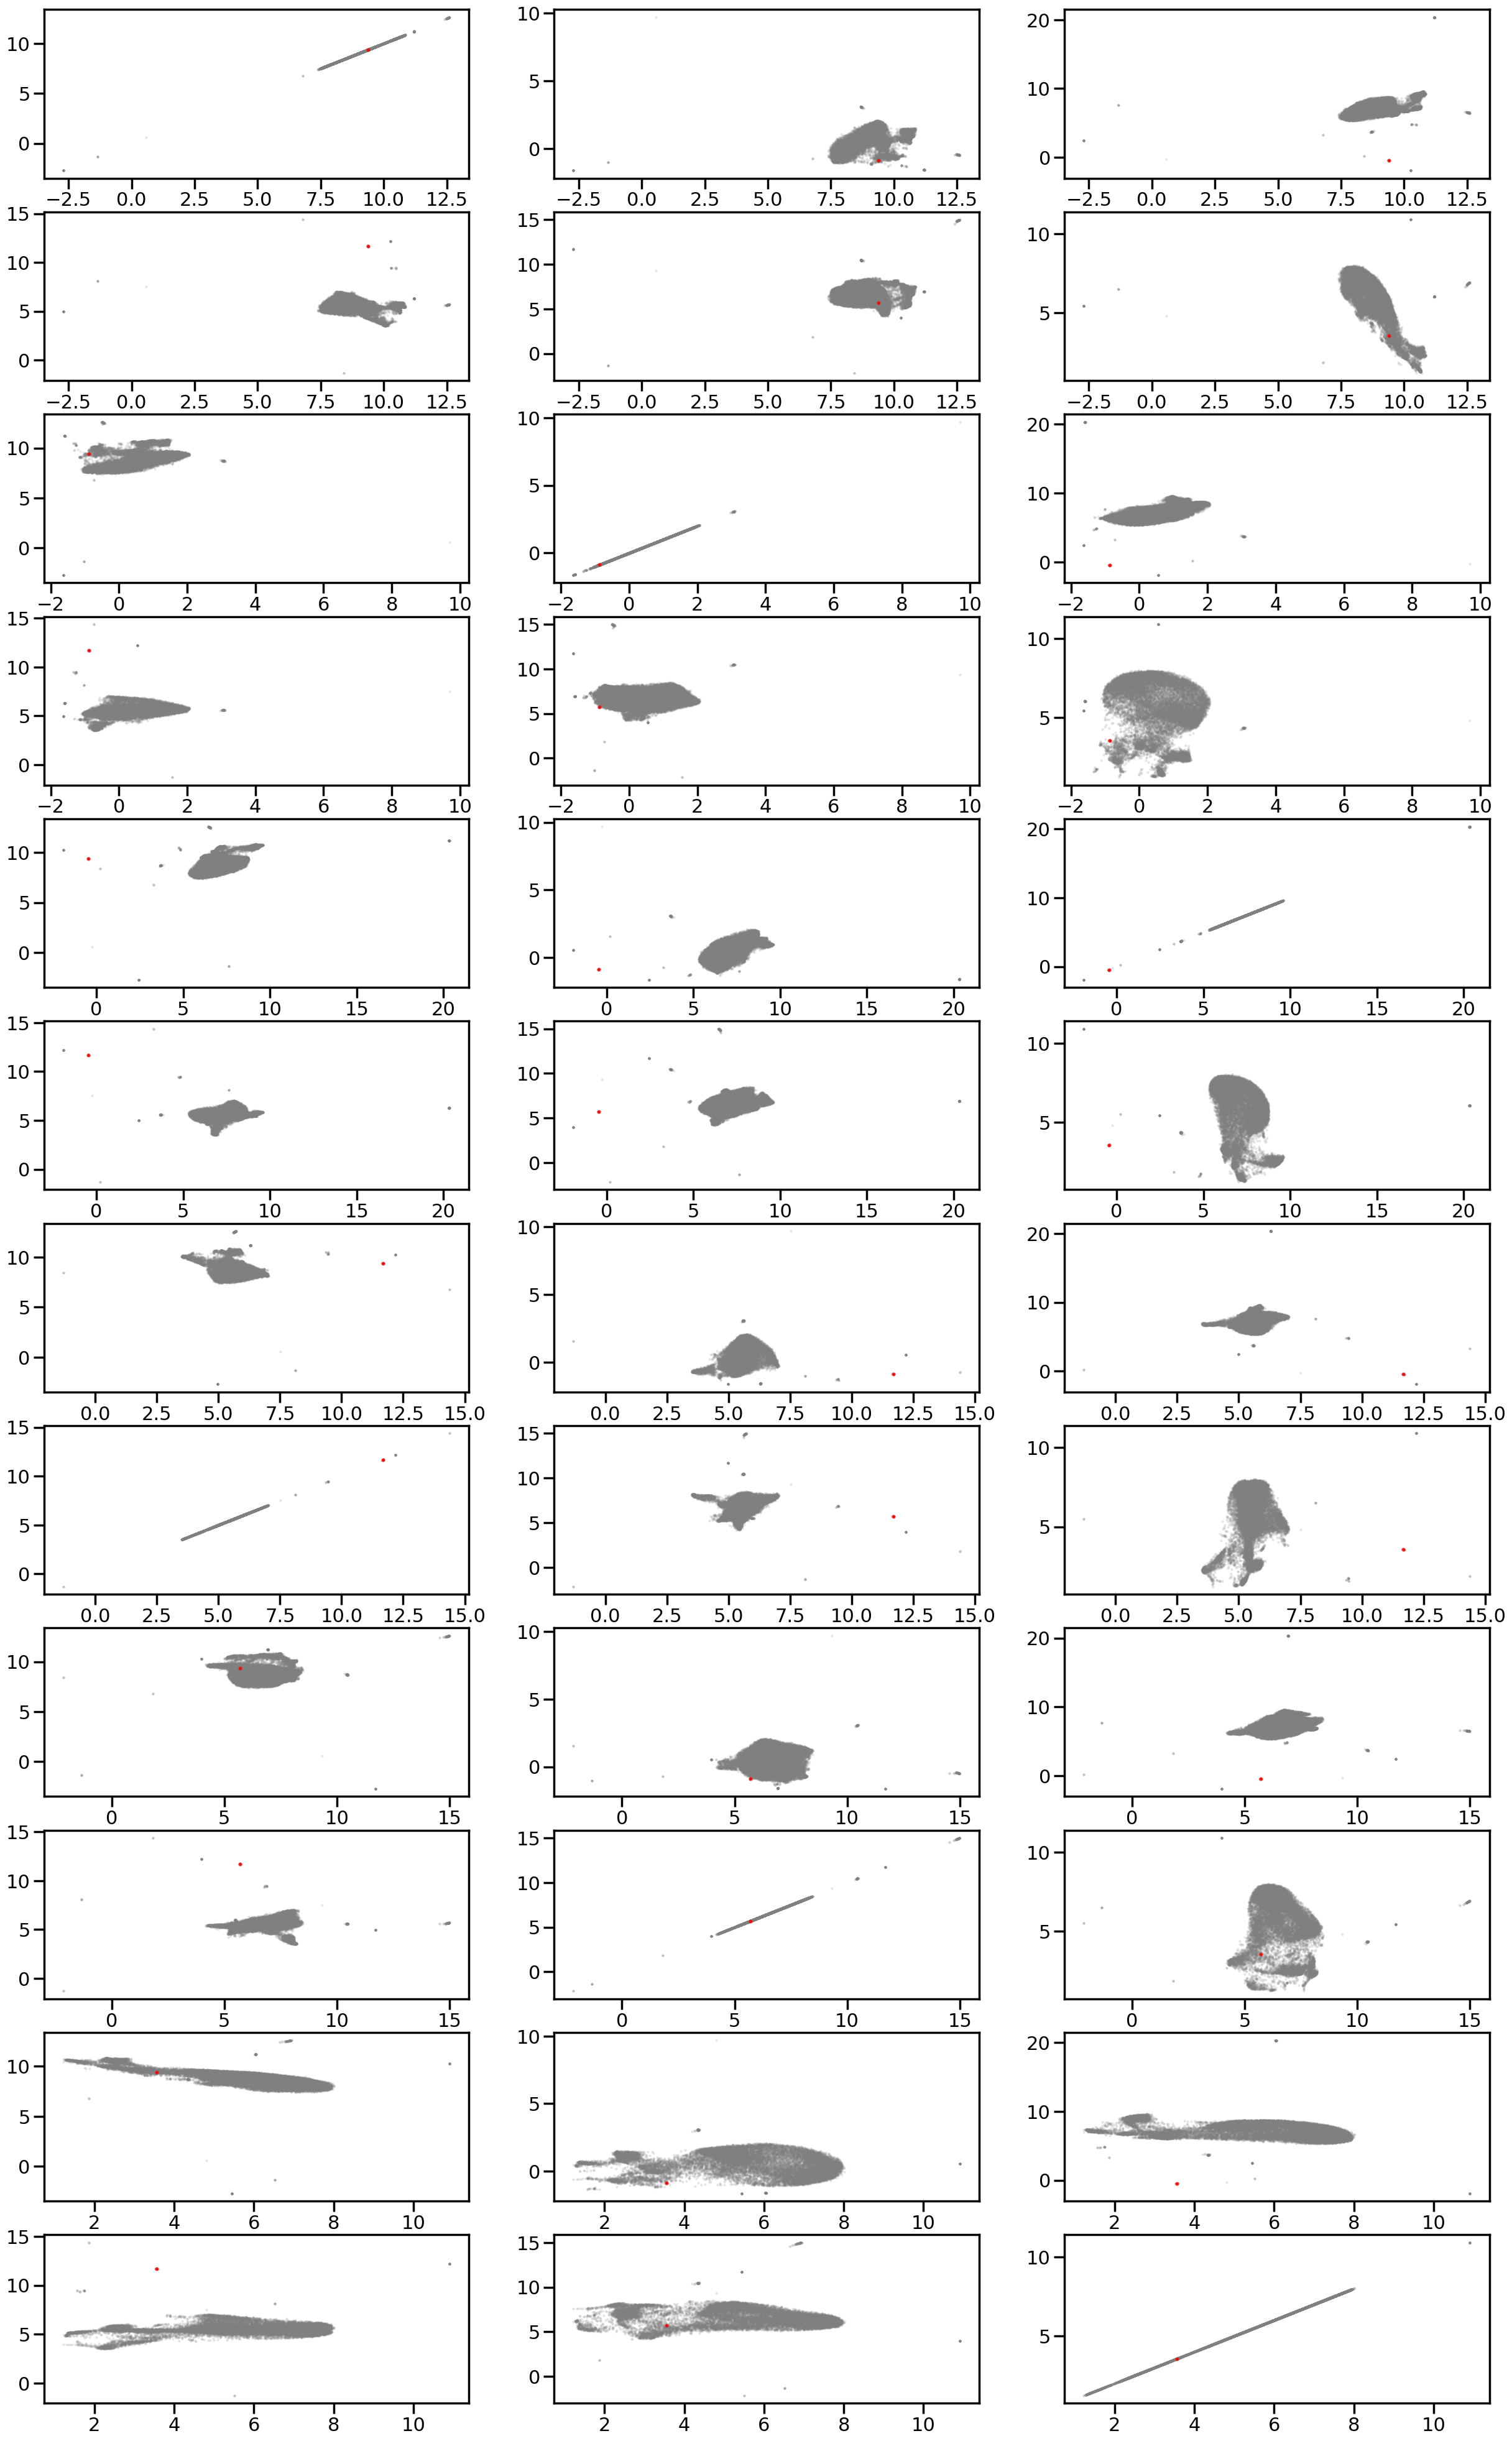

In [59]:
label= dm6_sampled[labels == unique[7]]
plot_multi_scatter_outliers(dm6_sampled, label.index, 12,3)

In [25]:
dm6_sampled.iloc[outliers,dm6_sampled.columns == "dim_1"]

,dim_1
880862,12.405603
1386462,-1.338234
3081181,12.423427
222501,10.272036
1525656,10.167212
2942213,9.774774
636168,8.697529
1463261,10.159150
211132,10.269825
1310441,10.272717


Unique predicted labels [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13] with their amounts [19502    39    21    43    28    33    20    41    31    26    25    21
    60    68    42]
Time taken 1.22 minutes


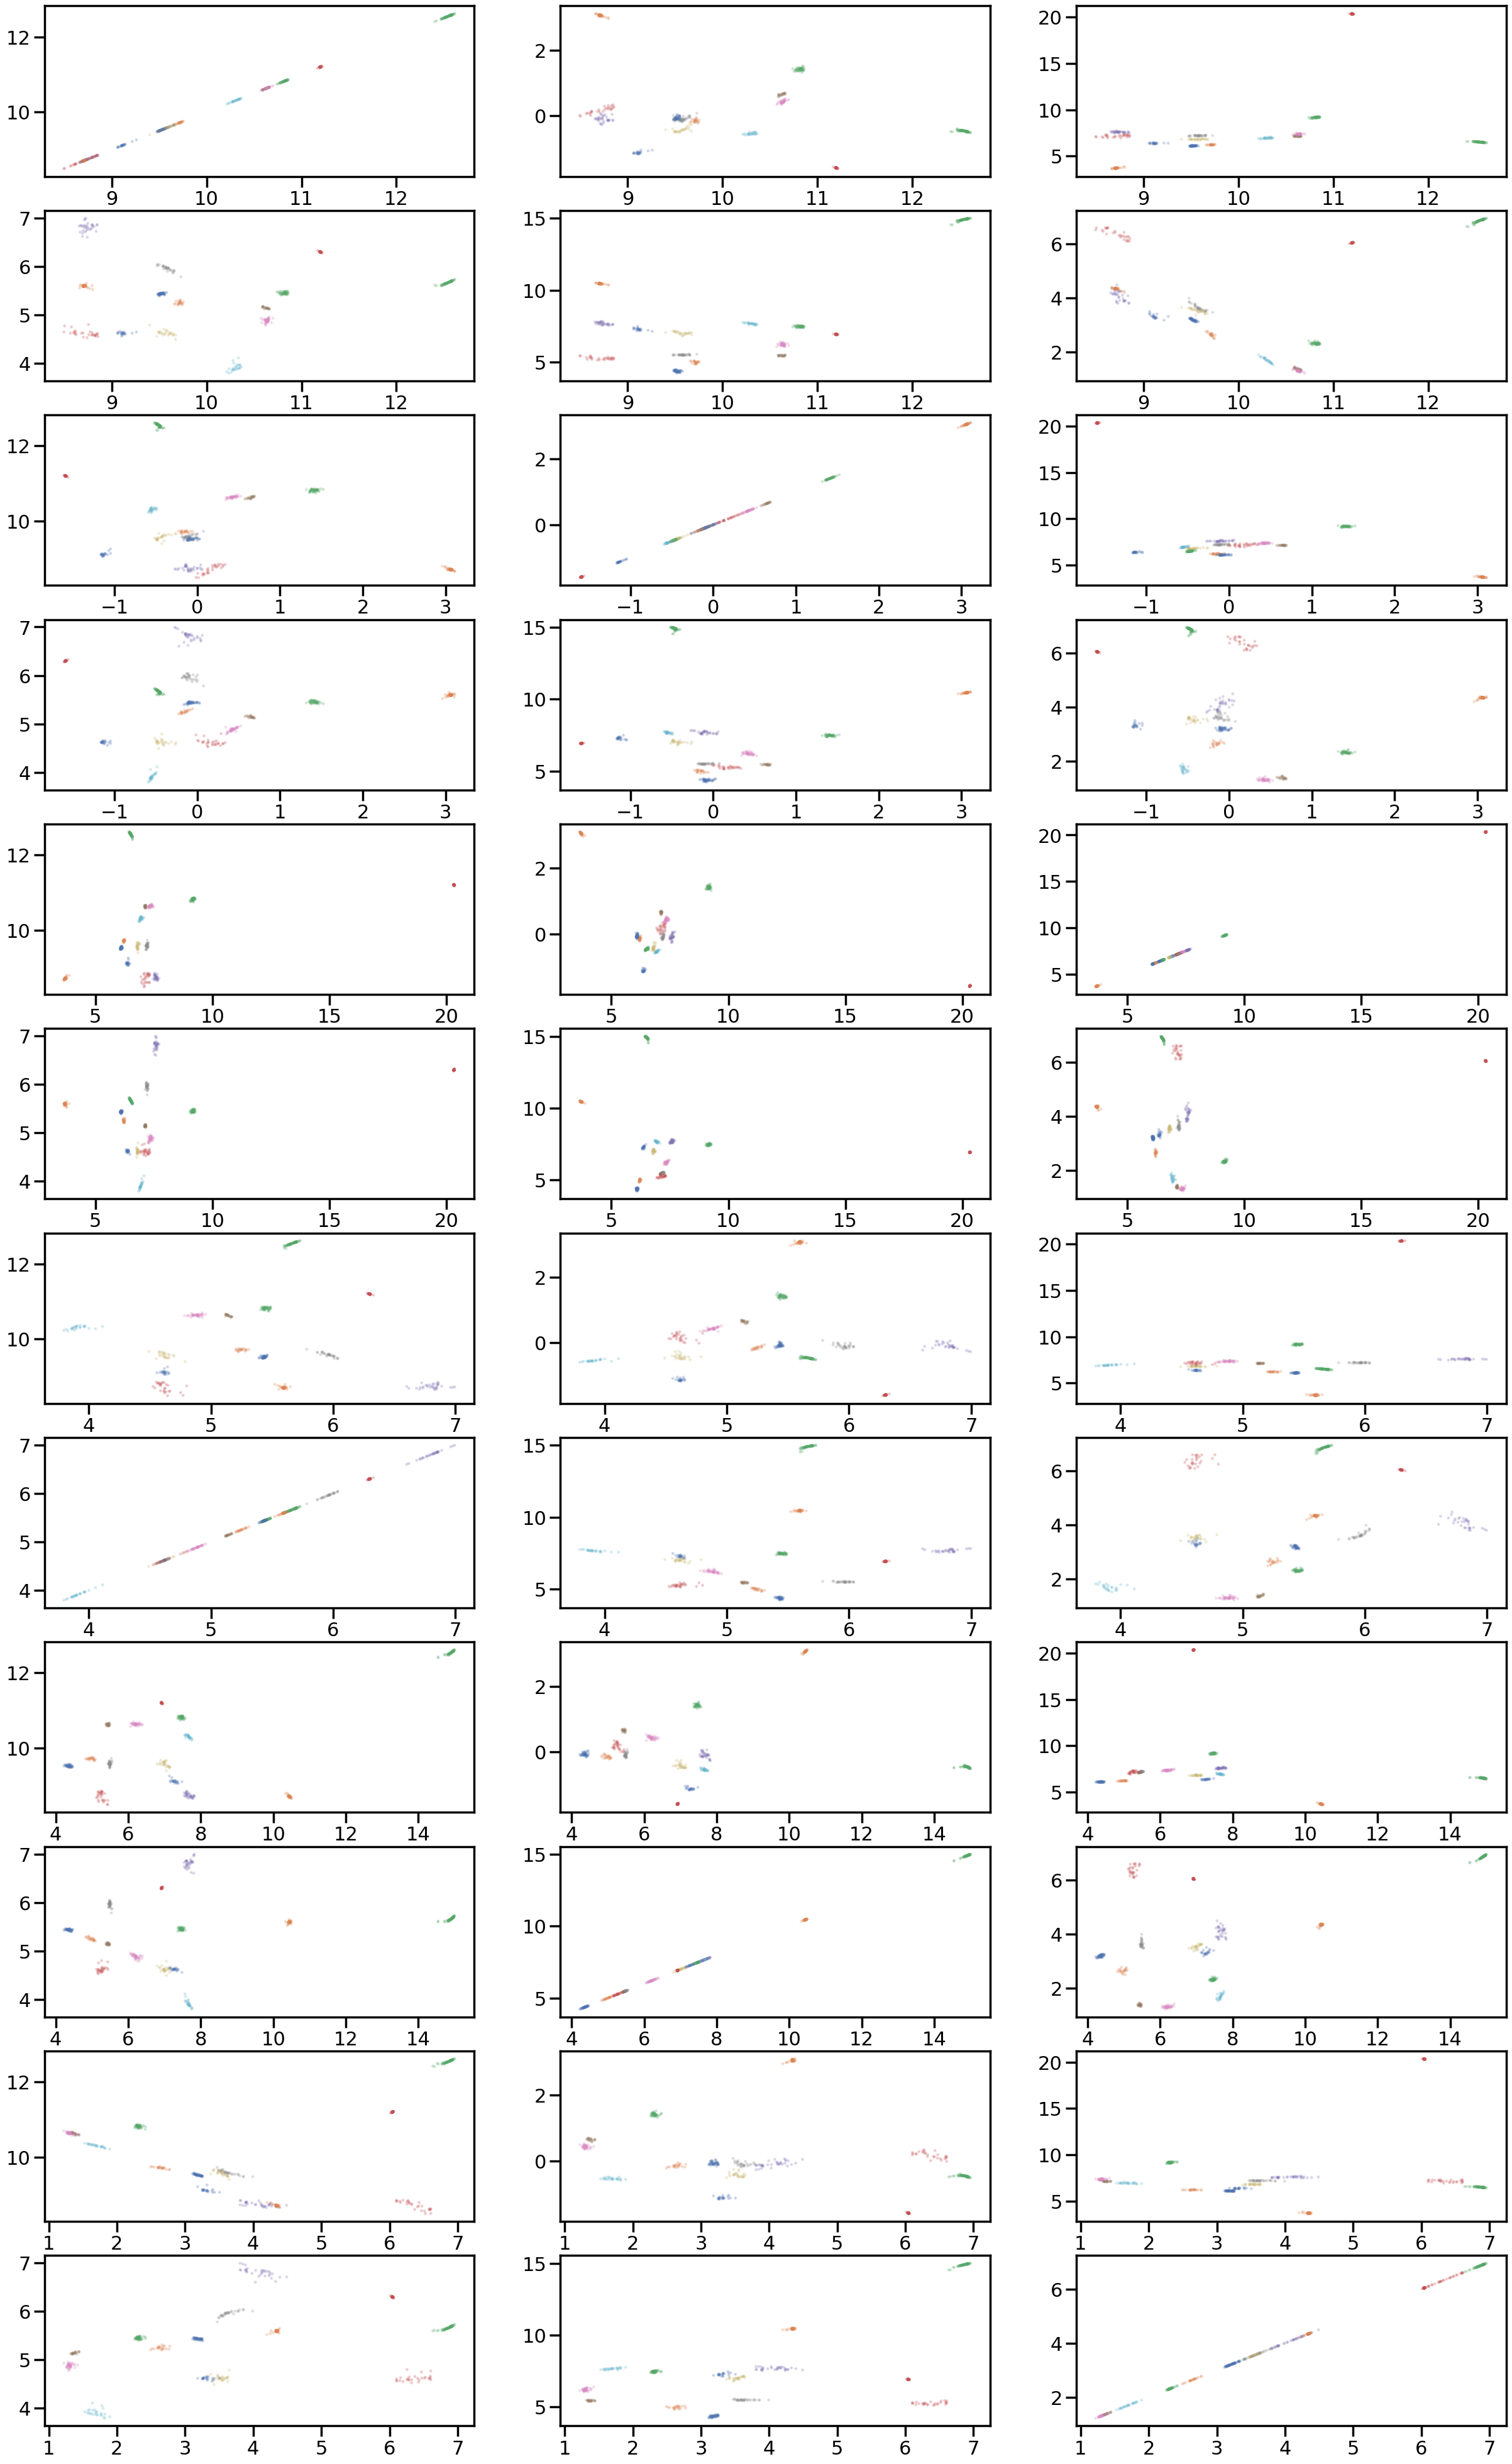

In [94]:
from sklearn.cluster import OPTICS

chosen_param = {"min_samples":20,
                "metric": 'minkowski'}
model, labels = fit_predict_score( dm6_sampled, OPTICS, param=chosen_param, evaluators=None)
#plot_scatter_preset_with_labels(dm6_sampled,labels,[0,1])
plot_multi_scatter_with_labels(dm6_sampled,labels, 12, 3, remove_noise=True)